Utilizando a base de dados archive.ics.uci.edu/ml/datasets/iris:

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. (25 pontos) Utilizando o classicador Naive Bayes para dados categóricos e metade dos exemplos de cada classe como conjunto de treino e o resante como conjunto de teste, avalie o classicador utilizando discretização de variáveis. Experimente diferene quantidades de intervalos por variável e escolha o mais adequado.

In [82]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datasets = {}
by_class = data.groupby('variety')

for groups, data2 in by_class:
    datasets[groups] = data2

first_half = datasets["Iris-setosa"][:len(datasets["Iris-setosa"])//2]
second_half = datasets["Iris-setosa"][len(datasets["Iris-setosa"])//2:]

first_half = first_half.append(datasets["Iris-versicolor"][:len(datasets["Iris-versicolor"])//2], ignore_index=True)
second_half = second_half.append(datasets["Iris-versicolor"][len(datasets["Iris-versicolor"])//2:], ignore_index=True)


first_half = first_half.append(datasets["Iris-virginica"][:len(datasets["Iris-virginica"])//2], ignore_index=True)
second_half = second_half.append(datasets["Iris-virginica"][len(datasets["Iris-virginica"])//2:], ignore_index=True)

second_half


/tmp/ipykernel_457/4036210145.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_half = first_half.append(datasets["Iris-versicolor"][:len(datasets["Iris-versicolor"])//2], ignore_index=True)
/tmp/ipykernel_457/4036210145.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  second_half = second_half.append(datasets["Iris-versicolor"][len(datasets["Iris-versicolor"])//2:], ignore_index=True)
/tmp/ipykernel_457/4036210145.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_half = first_half.append(datasets["Iris-virginica"][:len(datasets["Iris-virginica"])//2], ignore_index=True)
/tmp/ipykernel_457/4036210145.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.0,3.0,1.6,0.2,Iris-setosa
1,5.0,3.4,1.6,0.4,Iris-setosa
2,5.2,3.5,1.5,0.2,Iris-setosa
3,5.2,3.4,1.4,0.2,Iris-setosa
4,4.7,3.2,1.6,0.2,Iris-setosa
...,...,...,...,...,...
70,6.7,3.0,5.2,2.3,Iris-virginica
71,6.3,2.5,5.0,1.9,Iris-virginica
72,6.5,3.0,5.2,2.0,Iris-virginica
73,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
reorganized_df = first_half.append(second_half, ignore_index=True)

target = reorganized_df["variety"]

reorganized_df_wt_class = reorganized_df.drop(["variety"], axis=1)

reorganized_df_wt_class_2_i = reorganized_df_wt_class.copy()

reorganized_df_wt_class_3_i = reorganized_df_wt_class.copy()

reorganized_df_wt_class_4_i = reorganized_df_wt_class.copy()

reorganized_df_wt_class_5_i = reorganized_df_wt_class.copy()

reorganized_df_wt_class_6_i = reorganized_df_wt_class.copy()

reorganized_df_wt_class_7_i = reorganized_df_wt_class.copy()

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_2_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=2, labels=[1, 2], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_3_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=3, labels=[1, 2, 3], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_4_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=4, labels=[1, 2, 3, 4], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_5_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=5, labels=[1, 2, 3, 4, 5], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_6_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=6, labels=[1, 2, 3, 4, 5, 6], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

for x in reorganized_df_wt_class:
    reorganized_df_wt_class_7_i[x] = pd.cut(x=reorganized_df_wt_class[x], bins=7, labels=[1, 2, 3, 4, 5, 6, 7], retbins=False,
                                            right=False, duplicates='raise', ordered=True)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(reorganized_df_wt_class_2_i, target, test_size=0.5, random_state=0)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(reorganized_df_wt_class_3_i, target, test_size=0.5, random_state=0)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(reorganized_df_wt_class_4_i, target, test_size=0.5, random_state=0)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(reorganized_df_wt_class_5_i, target, test_size=0.5, random_state=0)

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(reorganized_df_wt_class_6_i, target, test_size=0.5, random_state=0)

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(reorganized_df_wt_class_7_i, target, test_size=0.5, random_state=0)


/tmp/ipykernel_457/1033233223.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reorganized_df = first_half.append(second_half, ignore_index=True)


In [84]:
cont = y_train_3.value_counts()

cont

Iris-versicolor    28
Iris-setosa        24
Iris-virginica     23
Name: variety, dtype: int64

In [85]:
cont = y_test_3.value_counts()

cont

Iris-virginica     27
Iris-setosa        26
Iris-versicolor    22
Name: variety, dtype: int64

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

cnb = GaussianNB()
cnb.fit(X_train_2, y_train_2)
predict = cnb.predict(X_test_2)

metrics.accuracy_score(y_test_2, predict)

0.7333333333333333

In [87]:
cnb = GaussianNB()
cnb.fit(X_train_3, y_train_3)
predict = cnb.predict(X_test_3)

metrics.accuracy_score(y_test_3, predict)

0.96

In [88]:
cnb = GaussianNB()
cnb.fit(X_train_4, y_train_4)
predict = cnb.predict(X_test_4)

metrics.accuracy_score(y_test_4, predict)

0.9066666666666666

In [89]:
cnb = GaussianNB()
cnb.fit(X_train_5, y_train_5)
predict = cnb.predict(X_test_5)

metrics.accuracy_score(y_test_5, predict)

0.88

In [90]:
cnb = GaussianNB()
cnb.fit(X_train_6, y_train_6)
predict = cnb.predict(X_test_6)

metrics.accuracy_score(y_test_6, predict)

0.8933333333333333

In [91]:
cnb = GaussianNB()
cnb.fit(X_train_7, y_train_7)
predict = cnb.predict(X_test_7)

metrics.accuracy_score(y_test_7, predict)

0.8

<font color='#ebaf09'>Verificamos que com 3 intervalos obtivemos o melhor resultado</font>

#### 2. (25 pontos) Faça sua própria implementação da Janela de Parzen retangular e mostre o gráfico da densidade a posteriori de cada variável por classe. Experimente diferente larguras de janelas e escolha a mais adequada.

In [74]:
#xi = vetor de atributos
#x  = ponto central da janela
#h  = largura da janela
#calcula a distancia de um exemplo para o ponto central da janela
def distance(xi, x, h):
    soma = 0
    for i in range(len(xi)):
        soma = soma + (xi[i] - x[i])
    
    return soma/h

In [73]:
#função de kernel
def fi(a):
    a = -a if(a < 0) else a
    return 1 if(a <= 0.5) else 0

In [72]:
def density(h, n, x, xi):
    prob = []
    
    for i in range(len(xi)):
        prob.append((1/h) * ((1/n)*fi(distance(xi.iloc[i].to_list(), x, h))))
    return prob

In [24]:
setosa = data.loc[data['variety'] == 'Iris-setosa']
versic = data.loc[data['variety'] == 'Iris-versicolor']
virgin = data.loc[data['variety'] == 'Iris-virginica']

In [31]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
setosa_x = [setosa['sepal_length'].mean(), setosa['sepal_width'].mean(), setosa['petal_length'].mean(), setosa['petal_width'].mean()]
setosa_x

[5.006, 3.418, 1.464, 0.244]

<AxesSubplot:>

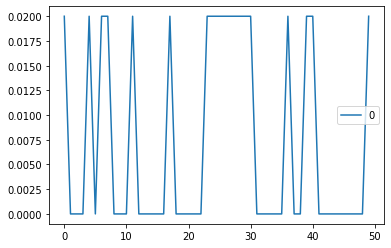

In [81]:
pd.DataFrame(density(1, 50, setosa_x, setosa.drop(['variety'], axis=1))).plot.line()

<AxesSubplot:>

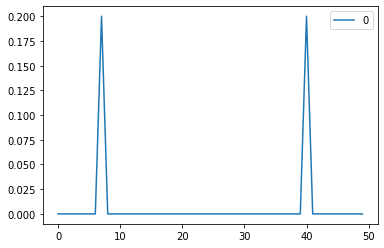

In [92]:
pd.DataFrame(density(0.1, 50, setosa_x, setosa.drop(['variety'], axis=1))).plot.line()

#### 3. (25 pontos) Faça sua própria implementação da Janela de Parzen gaussiana e mostre o grácoda densidade a posteriori de cada variável por classe. Experimente diferente larguras de janelas e escolha a mais adequada.

#### 4. (25 pontos) Faça sua própria implementação do classicador Naive Bayes utilizando estimação de densidade por Janela de Parzen. Avalie o classicador utilizando metade de todos os